# Import libraries 

In [264]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read data 

In [265]:
root_path = "C:/Users/USER/Desktop/umojahack/"
train = pd.read_csv(root_path + 'Train.csv')
test = pd.read_csv(root_path + 'Test.csv')
ss = pd.read_csv(root_path + 'SampleSubmission.csv')
variable_def = pd.read_csv(root_path + 'VariableDefinitions_-_Sheet1.csv')

# Simple EDA

In [266]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [267]:
(test['Policy Start Date']  == test["First Transaction Date"]).value_counts()

True    5177
dtype: int64

In [268]:
train['ProductName'].value_counts()

Car Classic         6485
CarSafe             3774
Customized Motor     545
Car Plus             486
CVTP                 469
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            5
Name: ProductName, dtype: int64

In [269]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [270]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [271]:
variable_def

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [272]:
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',ss.shape)

Train shape: (12079, 14) 
Test shape: (5177, 13) 
samplesubmission shape: (5177, 2)


In [273]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [274]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      5177 non-null   object
 1   Policy Start Date       5177 non-null   object
 2   Policy End Date         5177 non-null   object
 3   Gender                  5021 non-null   object
 4   Age                     5177 non-null   int64 
 5   First Transaction Date  5177 non-null   object
 6   No_Pol                  5177 non-null   int64 
 7   Car_Category            3539 non-null   object
 8   Subject_Car_Colour      2172 non-null   object
 9   Subject_Car_Make        4116 non-null   object
 10  LGA_Name                2395 non-null   object
 11  State                   2389 non-null   object
 12  ProductName             5177 non-null   object
dtypes: int64(2), object(11)
memory usage: 525.9+ KB


# Since the ratio of categorical variables to numerical variable is high, consider combining both train and test for easy preproccessing 

In [275]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


In [276]:
all_data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
17251,ZYXX5AF,2010-07-18,2011-07-17,Male,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,NaN
17252,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,NaN
17253,ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe,NaN
17254,ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,NaN
17255,ZZYTLV1,2010-07-17,2011-07-16,Male,68,2010-07-17,1,Saloon,NaN,Peugeot,NaN,NaN,CarSafe,NaN


In [277]:
date_col = ['Policy Start Date','Policy End Date']
num_col = ['Age', 'No_Pol']
cat_col = [col for col in test.columns if col not in date_col+num_col]
cat_col

['ID',
 'Gender',
 'First Transaction Date',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [278]:
cat_col.remove('ID')
cat_col.remove('First Transaction Date')

In [279]:
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [280]:
test.describe()

,Age,No_Pol
count,5177.000000,5177.000000
mean,43.710257,1.308287
std,22.439018,0.712004
min,-76.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,50.000000,1.000000
max,320.000000,10.000000


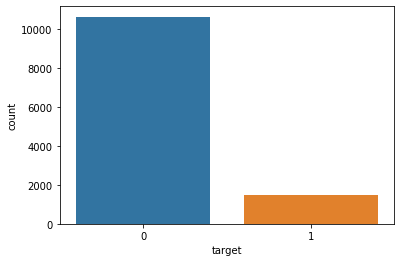

In [281]:
sns.countplot(train.target)

The dataset is is skewed towards class 0, consider balancing the dataset 

In [282]:
print("Are There Missing value in train? :",train.isnull().any().any())
print((train.isnull().sum()/train.shape[0])*100)

Are There Missing value in train? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
dtype: float64


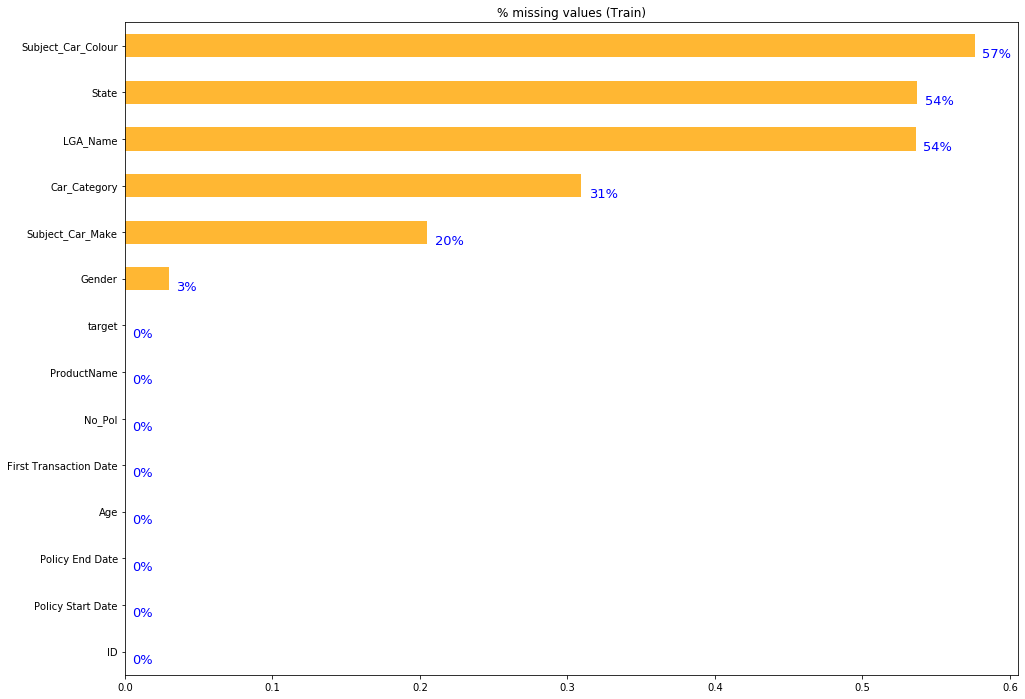

In [283]:
ax_train = train.isna().sum().transform(lambda x:x/train.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Train)', color='orange', alpha=.8)
for i in ax_train.patches:
    ax_train.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='blue', alpha=1)

In [284]:
print("Are There Missing value in test? :",test.isnull().any().any())
print((test.isnull().sum()/test.shape[0])*100)

Are There Missing value in test? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.013328
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.639946
Subject_Car_Colour        58.045200
Subject_Car_Make          20.494495
LGA_Name                  53.737686
State                     53.853583
ProductName                0.000000
dtype: float64


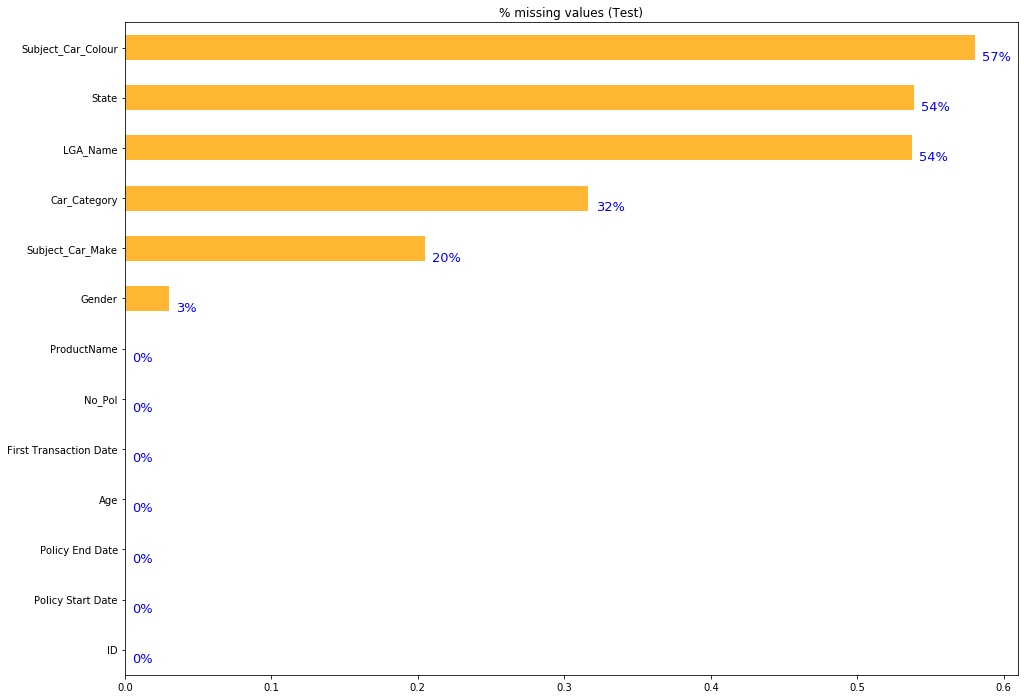

In [285]:
ax_test = test.isna().sum().transform(lambda x:x/test.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Test)', color='orange', alpha=.8)
for i in ax_test.patches:
    ax_test.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='blue', alpha=1)

Remember to handle the missing values 

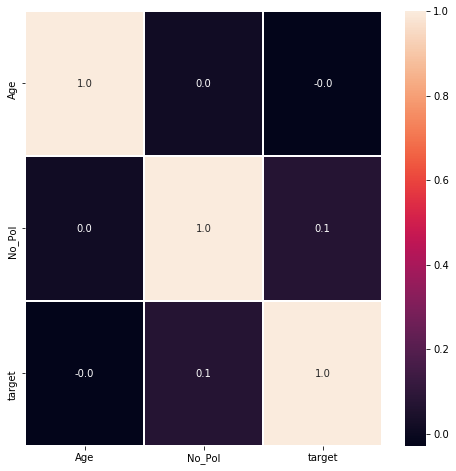

In [286]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

### Correlation might not be a best measure for this dataset since there are more categorical features

In [287]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [288]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

In [289]:
# check_categorical_relationship(cat_col,'Age',all_data)

In [290]:
# check_categorical_relationship(cat_col,'No_Pol',all_data)

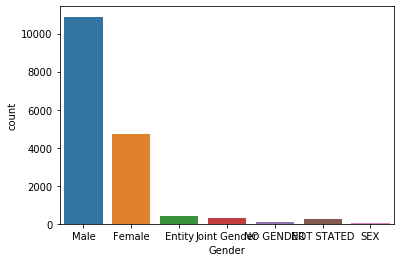

In [291]:
# Gender distribution 
sns.countplot(all_data.Gender)

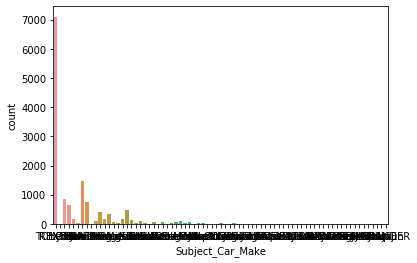

In [292]:
sns.countplot(all_data.Subject_Car_Make)

In [293]:
all_data.Subject_Car_Make.value_counts()[:12]

TOYOTA         7099
Honda          1484
Lexus           856
Mercedes        754
Hyundai         654
Kia             484
Ford            402
Nissan          344
Volkswagen      177
Iveco           172
Range Rover     162
Mitsubishi      131
Name: Subject_Car_Make, dtype: int64

In [294]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

# Basic Data preprocessing 

In [295]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


### fill mising value

In [296]:
all_data = all_data.fillna(9999)
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0


In [297]:
print("Are There still Missing value in data? :",all_data.isnull().any().any())
print((all_data.isnull().sum()/all_data.shape[0])*100)

Are There still Missing value in data? : False
ID                        0.0
Policy Start Date         0.0
Policy End Date           0.0
Gender                    0.0
Age                       0.0
First Transaction Date    0.0
No_Pol                    0.0
Car_Category              0.0
Subject_Car_Colour        0.0
Subject_Car_Make          0.0
LGA_Name                  0.0
State                     0.0
ProductName               0.0
target                    0.0
dtype: float64


### date features

In [298]:
date_col

['Policy Start Date', 'Policy End Date']

In [299]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [300]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      17256 non-null  object        
 1   Policy Start Date       17256 non-null  datetime64[ns]
 2   Policy End Date         17256 non-null  datetime64[ns]
 3   Gender                  17256 non-null  object        
 4   Age                     17256 non-null  int64         
 5   First Transaction Date  17256 non-null  object        
 6   No_Pol                  17256 non-null  int64         
 7   Car_Category            17256 non-null  object        
 8   Subject_Car_Colour      17256 non-null  object        
 9   Subject_Car_Make        17256 non-null  object        
 10  LGA_Name                17256 non-null  object        
 11  State                   17256 non-null  object        
 12  ProductName             17256 non-null  object

In [301]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0


In [302]:
# create new column Policy_Duration = End date - Start date
all_data['Policy Duration'] = all_data['Policy End Date'] - all_data['Policy Start Date']
all_data['Policy Duration'] = all_data['Policy Duration'].dt.days

In [303]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.year
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [304]:
extract_date_info(all_data,date_col)

In [305]:
all_data.head()

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,...,target,Policy Duration,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter
0,0040R73,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,...,0.0,364,2010,14,5,2,2011,13,5,2
1,0046BNK,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,...,1.0,364,2010,29,11,4,2011,28,11,4
2,005QMC3,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,...,0.0,364,2010,21,3,1,2011,20,3,1
3,0079OHW,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,...,0.0,364,2010,21,8,3,2011,20,8,3
4,00BRP63,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,...,1.0,124,2010,29,8,3,2010,31,12,4


In [306]:
all_data.isnull().sum()

ID                           0
Gender                       0
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category                 0
Subject_Car_Colour           0
Subject_Car_Make             0
LGA_Name                     0
State                        0
ProductName                  0
target                       0
Policy Duration              0
Policy Start Date_year       0
Policy Start Date_day        0
Policy Start Date_month      0
Policy Start Date_quarter    0
Policy End Date_year         0
Policy End Date_day          0
Policy End Date_month        0
Policy End Date_quarter      0
dtype: int64

In [187]:
all_data.Gender.unique()
all_data.Car_Category.unique()
all_data.Subject_Car_Colour.unique()
all_data.Subject_Car_Make.unique()

array(['TOYOTA', 9999, 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj',
       'Datsun'], dtype=object)

In [188]:
gender_mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',9999:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }
subject_car_make_mapper = {'TOYOTA': 'TOYOTA', 9999: 'Others', 'Honda':'Honda', "Lexus":'Lexus', 'Mercedes':'Mercedes',
                           'Hyundai':'Hyundai', 'Kia':'Kia', 'Ford':'Ford', "Nissan":'Nissan', 'Volkswagen':'Volkswagen',
                          'Iveco':'Iveco', 'Range Rover': 'Range Rover'}
car_category_mapper = {'Saloon':'Saloon', 'JEEP':'JEEP'}
subject_car_colour_mapper = {'Black': 'Black', 'Silver':'Silver', 'As Attached': 'As Attached', 'Grey':'Grey', 'Blue':'Blue',
                            'White':'White', 'Red':'Red', 'Green':'Green','Gold':'Gold', 'Ash':'Ash', 'Wine':'Wine', 'Brown':'Brown'}

In [189]:
for make in list(all_data.Subject_Car_Make.unique()):
    if make not in subject_car_make_mapper.keys():
        subject_car_make_mapper[make] = 'Others'
        
for make in list(all_data.Car_Category.unique()):
    if make not in car_category_mapper.keys():
        car_category_mapper[make] = 'Others'
        
for make in list(all_data.Subject_Car_Colour.unique()):
    if make not in subject_car_colour_mapper.keys():
        subject_car_colour_mapper[make] = 'Others'

In [190]:
all_data.Gender = all_data.Gender.map(gender_mapper)
all_data.Subject_Car_Make = all_data.Subject_Car_Make.map(subject_car_make_mapper)
all_data.Car_Category = all_data.Car_Category.map(car_category_mapper)
all_data.Subject_Car_Colour = all_data.Subject_Car_Colour.map(subject_car_colour_mapper)

In [192]:
all_data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [193]:
# all_data = pd.get_dummies(all_data)
# all_data.info()

# Creat Base model 

In [307]:
all_data.target = all_data.target.astype(int)

In [308]:
# Policy start date and first payment date are the same
all_data.drop(columns=['ID', 'First Transaction Date'],inplace=True)
all_data.fillna(999999)

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Duration,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter
0,Male,30,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0,364,2010,14,5,2,2011,13,5,2
1,Female,79,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1,364,2010,29,11,4,2011,28,11,4
2,Male,43,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0,364,2010,21,3,1,2011,20,3,1
3,Male,2,1,9999,9999,9999,9999,9999,CarSafe,0,364,2010,21,8,3,2011,20,8,3
4,Entity,20,3,9999,9999,9999,Lagos,Lagos,Muuve,1,124,2010,29,8,3,2010,31,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17251,Male,48,1,Saloon,9999,Honda,9999,9999,CarSafe,9999,364,2010,18,7,3,2011,17,7,3
17252,9999,50,1,9999,9999,9999,Victoria Island,Lagos,Car Classic,9999,364,2010,4,12,4,2011,3,12,4
17253,Male,1,1,9999,9999,9999,9999,9999,CarSafe,9999,364,2010,24,9,3,2011,23,9,3
17254,Female,52,1,Saloon,Grey,TOYOTA,9999,9999,Car Classic,9999,364,2010,17,7,3,2011,16,7,3


In [309]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [310]:
test_n.drop("target",axis = 1,inplace = True)

In [311]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42,)

In [313]:
test_n.columns

Index(['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName',
       'Policy Duration', 'Policy Start Date_year', 'Policy Start Date_day',
       'Policy Start Date_month', 'Policy Start Date_quarter',
       'Policy End Date_year', 'Policy End Date_day', 'Policy End Date_month',
       'Policy End Date_quarter'],
      dtype='object')

In [314]:
categorical_feat = ['Gender', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

In [315]:
categorical_feat

['Gender',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [316]:
from catboost import CatBoostClassifier
import catboost
model = CatBoostClassifier(n_estimators=1500, cat_features=categorical_feat, verbose=50)

In [317]:
model.fit(X_train,y_train)

Learning rate set to 0.017346
0:	learn: 0.6754927	total: 32.9ms	remaining: 49.4s
50:	learn: 0.3637450	total: 974ms	remaining: 27.7s
100:	learn: 0.3140407	total: 1.97s	remaining: 27.3s
150:	learn: 0.2970624	total: 3.14s	remaining: 28s
200:	learn: 0.2887279	total: 4.29s	remaining: 27.8s
250:	learn: 0.2835262	total: 5.56s	remaining: 27.7s
300:	learn: 0.2793428	total: 6.77s	remaining: 27s
350:	learn: 0.2761094	total: 8.06s	remaining: 26.4s
400:	learn: 0.2730130	total: 9.27s	remaining: 25.4s
450:	learn: 0.2703669	total: 10.6s	remaining: 24.6s
500:	learn: 0.2675018	total: 12.1s	remaining: 24.1s
550:	learn: 0.2650530	total: 13.5s	remaining: 23.2s
600:	learn: 0.2625247	total: 14.7s	remaining: 22s
650:	learn: 0.2602722	total: 16s	remaining: 20.8s
700:	learn: 0.2579962	total: 17.2s	remaining: 19.6s
750:	learn: 0.2556564	total: 18.4s	remaining: 18.3s
800:	learn: 0.2534450	total: 19.6s	remaining: 17.1s
850:	learn: 0.2508823	total: 20.9s	remaining: 15.9s
900:	learn: 0.2488978	total: 22.1s	remaining

In [318]:
y_pred = model.predict(X_train)

In [319]:
from sklearn.metrics import classification_report

In [320]:
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94      7110
     class 1       0.75      0.14      0.24       982

    accuracy                           0.89      8092
   macro avg       0.82      0.57      0.59      8092
weighted avg       0.88      0.89      0.86      8092



In [321]:
print('*************** Classification report on testing set ********************')
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

*************** Classification report on testing set ********************
              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94      3514
     class 1       0.46      0.06      0.10       473

    accuracy                           0.88      3987
   macro avg       0.67      0.52      0.52      3987
weighted avg       0.84      0.88      0.84      3987



### Train on full train dataset

In [322]:
model.fit(X,y)

Learning rate set to 0.020582
0:	learn: 0.6711661	total: 35.8ms	remaining: 53.6s
50:	learn: 0.3466652	total: 1.3s	remaining: 37s
100:	learn: 0.3071546	total: 3.09s	remaining: 42.8s
150:	learn: 0.2940957	total: 5.13s	remaining: 45.9s
200:	learn: 0.2887295	total: 6.93s	remaining: 44.8s
250:	learn: 0.2847565	total: 8.74s	remaining: 43.5s
300:	learn: 0.2815364	total: 10.7s	remaining: 42.5s
350:	learn: 0.2788910	total: 12.9s	remaining: 42.2s
400:	learn: 0.2763188	total: 14.8s	remaining: 40.4s
450:	learn: 0.2733915	total: 16.5s	remaining: 38.4s
500:	learn: 0.2707310	total: 18.7s	remaining: 37.3s
550:	learn: 0.2681193	total: 20.7s	remaining: 35.7s
600:	learn: 0.2657683	total: 22.4s	remaining: 33.6s
650:	learn: 0.2634317	total: 24.2s	remaining: 31.6s
700:	learn: 0.2606025	total: 26.1s	remaining: 29.8s
750:	learn: 0.2581040	total: 28.2s	remaining: 28.1s
800:	learn: 0.2558807	total: 30.2s	remaining: 26.4s
850:	learn: 0.2534961	total: 32.4s	remaining: 24.7s
900:	learn: 0.2512298	total: 34.2s	rema

## Voting classifier

In [332]:
lgm = LGBMClassifier(n_estimators=1500, categorical_feature=categorical_feat)
from rgf import RGFClassifier
rgf = RGFClassifier()
vcf = VotingClassifier(estimators=[('rgf', rgf),('cat',model)], voting='soft')
vcf.fit(X,y)
prediction = vcf.predict_proba(test_n.drop('Applicant_ID', axis =1))[:,1]
# rgf.fit(X,y)

ValueError: could not convert string to float: 'Male'

# First submission file

In [323]:
set(test.ID == ss.ID)

{True}

In [324]:
prediction = model.predict(test_n)

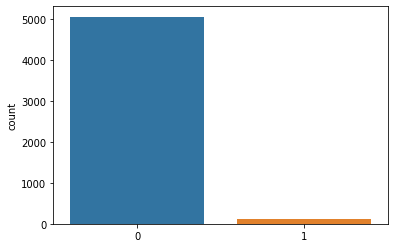

In [325]:
sns.countplot(prediction)

In [326]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [327]:
sub_file = ss.copy()

In [328]:
sub_file.target = prediction

In [329]:
sub_file.to_csv('005.csv',index=False)

# Improving on model performance tips

- Deep EDA and domain knowledge sourcing
- Re-group Categorical features 
- Feature Engineering 
- Dataset balancing
- Hyperparameter tunning with gridsearch
- Ensembling of models 
- Cross-validation to avoid over fitting and under-fitting

# ******************* GOOD LUCK!!! ***************************

In [240]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# import necessary libraries

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from rgf import RGFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
%matplotlib inline

import os, gc, warnings
warnings.filterwarnings('ignore')

In [471]:
def model_pred(estimator, train, label, test, name):
    
    train_mean, val_mean = [], []
    val_pred, test_pred = np.zeros(train.shape[0]), np.zeros(test.shape[0])
    
    for count, (train_index, test_index) in enumerate(skf.split(train, label)):
        train_x, test_x = train.iloc[train_index], train.iloc[test_index]
        train_y, test_y = label.iloc[train_index], label.iloc[test_index]
        
        print(f">>>>>>>>>>>>>>>Run: {count + 1}")
        
#         estimator.fit(train_x, train_y)
        pipe = Pipeline([("SC", MinMaxScaler()), ("estimator", estimator)])
        pipe.fit(train_x, train_y)
        if hasattr(estimator, 'decision_function'):
            train_predict = estimator.decision_function(train_x)
            test_predict = estimator.decision_function(test_x)
            val_pred[test_index] = test_predict
            test_pred += estimator.decision_function(test)
        else:
            train_predict = estimator.predict_proba(train_x)[:,1]
            test_predict = estimator.predict_proba(test_x)[:,1]
            val_pred[test_index] = test_predict
            test_pred += estimator.predict_proba(test)[:,1]
        
        print('\nValidation scores', roc_auc_score(test_y, test_predict))
        print('\nTraining scores', roc_auc_score(train_y, train_predict))
        
        train_mean.append(roc_auc_score(train_y, train_predict))
        val_mean.append(roc_auc_score(test_y, test_predict))
        
    print('Average Testing ROC score for 10 folds split:',np.mean(val_mean))
    print('Average Training ROC score for 10 folds split:',np.mean(train_mean))
    print('standard Deviation for 10 folds split:',np.std(val_mean))
    return val_pred, test_pred, name


def Stack(meta_estimator, train_stack, test_stack, label, file_name):
    prediction = meta_estimator.fit(train_stack, label).predict(test_stack)
    test['default_status'] = prediction
    test.to_csv(file_name,index=False)

In [465]:
skf = StratifiedKFold(n_splits = 10,shuffle=True,random_state=21)

In [466]:
rf = RandomForestClassifier(n_estimators=1000)
gbc = GradientBoostingClassifier(n_estimators=1000)
xtc = ExtraTreesClassifier(n_estimators=1000)
ada = AdaBoostClassifier(n_estimators=1000)
lr = LogisticRegression()
sgd = SGDClassifier()
xgb = XGBClassifier()
lgm = LGBMClassifier(n_estimators=1500)
cat = CatBoostClassifier(iterations=1500)
rgf = RGFClassifier()
knc = KNeighborsClassifier()

models = [
    ('rf', rf),
    ('gbc', gbc),
    ('xtc', xtc),
    ('ada', ada),
    ('lr', lr),
    ('sgd', sgd),
    ('xgb', xgb),
    ('lgm', lgm),
    ('cat', cat),
    ('rgf', rgf),
    ('knc', knc),
]

In [467]:
train_stack_list = []
test_stack_list = []
cols = []
for model in models:
    print(f":{model[0]}:".upper())
    val_pred, test_pred, name = model_pred(model[1], X, y, test_n, model[0])
#     pd.concat([train_stack, pd.DataFrame(val_pred)])
#     pd.concat([test_stack, pd.DataFrame(test_pred)])
    train_stack_list.append(val_pred)
    test_stack_list.append(test_pred)
    cols.append(name)

:RF:
>>>>>>>>>>>>>>>Run: 1

Validation scores 0.7582281765984364

Training scores 0.8135087597435829
>>>>>>>>>>>>>>>Run: 2

Validation scores 0.7238038083498233

Training scores 0.8163942894599643
>>>>>>>>>>>>>>>Run: 3

Validation scores 0.7605475719336944

Training scores 0.8289385312948356
>>>>>>>>>>>>>>>Run: 4

Validation scores 0.7686184189184805

Training scores 0.828330502973674
>>>>>>>>>>>>>>>Run: 5

Validation scores 0.7725408250135437

Training scores 0.8281026373014266
>>>>>>>>>>>>>>>Run: 6

Validation scores 0.7612123674638186

Training scores 0.8302014004057632
>>>>>>>>>>>>>>>Run: 7

Validation scores 0.7521476665892733

Training scores 0.8247660437794178
>>>>>>>>>>>>>>>Run: 8

Validation scores 0.7565074942599901

Training scores 0.8219357755081268
>>>>>>>>>>>>>>>Run: 9

Validation scores 0.7727407579392719

Training scores 0.8227235257206837
>>>>>>>>>>>>>>>Run: 10

Validation scores 0.7507013442431327

Training scores 0.8255071362310418
Average Testing ROC score for 10 fo

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547'] ['Age', 'No_Pol', 'Policy Duration', 'Policy Start Date_year', 'Policy Start Date_day', 'Policy Start Date_month', 'Policy Start Date_quarter', 'Policy End Date_year', 'Policy End Date_day', 'Policy End Date_month', 'Policy End Date_quarter', 'Gender_F', 'Gender_M', 'Gender_O', 'Car_Category_9999', 'Car_Category_Bus', 'Car_Category_CAMRY CAR HIRE', 'Car_Category_JEEP', 'Car_Category_Mini Bus', 'Car_Category_Mini Van', 'Car_Category_Motorcycle', 'Car_Category_Pick Up', 'Car_Category_Pick Up > 3 Tons', 'Car_Category_Saloon', 'Car_Category_Sedan', 'Car_Category_Shape Of Vehicle Chasis', 'Car_Category_Station 4 Wheel', 'Car_Category_Tipper Truck', 'Car_Category_Truck', 'Car_Category_Van', 'Car_Category_Wagon', 'Subject_Car_Colour_9999', 'Subject_Car_Colour_As Attached', 'Subject_Car_Colour_Ash', 'Subject_Car_Colour_B.Silver', 'Subject_Car_Colour_Beige Mitalic', 'Subject_Car_Colour_Black', 'Subject_Car_Colour_Black & Orange', 'Subject_Car_Colour_Black & White', 'Subject_Car_Colour_Blue', 'Subject_Car_Colour_Blue & Red', 'Subject_Car_Colour_Blue Sky', 'Subject_Car_Colour_Blue&White&Red', 'Subject_Car_Colour_Brown', 'Subject_Car_Colour_Burgundy', 'Subject_Car_Colour_Champagne', 'Subject_Car_Colour_Cream', 'Subject_Car_Colour_D. Gold', 'Subject_Car_Colour_D. Red', 'Subject_Car_Colour_Dark Blue', 'Subject_Car_Colour_Dark Gray', 'Subject_Car_Colour_Dark Green', 'Subject_Car_Colour_Dark Grey', 'Subject_Car_Colour_Dark Red', 'Subject_Car_Colour_Gold', 'Subject_Car_Colour_Gray & Gray', 'Subject_Car_Colour_Gray & Silver', 'Subject_Car_Colour_Green', 'Subject_Car_Colour_Grey', 'Subject_Car_Colour_Light Blue', 'Subject_Car_Colour_Light Gray', 'Subject_Car_Colour_Light Green', 'Subject_Car_Colour_Orange', 'Subject_Car_Colour_Purple', 'Subject_Car_Colour_Red', 'Subject_Car_Colour_Red & Black', 'Subject_Car_Colour_Red & Blue', 'Subject_Car_Colour_Red & White', 'Subject_Car_Colour_Red & Yellow', 'Subject_Car_Colour_Red Maroon', 'Subject_Car_Colour_Silver', 'Subject_Car_Colour_White', 'Subject_Car_Colour_White & Blue', 'Subject_Car_Colour_White & Red', 'Subject_Car_Colour_White & Yellow', 'Subject_Car_Colour_Wine', 'Subject_Car_Colour_Yellow', 'Subject_Car_Colour_Yellow & White', 'Subject_Car_Make_9999', 'Subject_Car_Make_.', 'Subject_Car_Make_ABG', 'Subject_Car_Make_ACURA', 'Subject_Car_Make_As Attached', 'Subject_Car_Make_Ashok Leyland', 'Subject_Car_Make_Astra', 'Subject_Car_Make_Audi', 'Subject_Car_Make_BMW', 'Subject_Car_Make_BRILLIANCE', 'Subject_Car_Make_Bajaj', 'Subject_Car_Make_Black', 'Subject_Car_Make_Buik', 'Subject_Car_Make_CHANGAN', 'Subject_Car_Make_COMMANDER', 'Subject_Car_Make_Caddillac', 'Subject_Car_Make_Chevrolet', 'Subject_Car_Make_Chrysler', 'Subject_Car_Make_DAF', 'Subject_Car_Make_Datsun', 'Subject_Car_Make_Dodge', 'Subject_Car_Make_FOTON', 'Subject_Car_Make_Fiat', 'Subject_Car_Make_Ford', 'Subject_Car_Make_GAC', 'Subject_Car_Make_GMC', 'Subject_Car_Make_Geely', 'Subject_Car_Make_Grand Cherokee', 'Subject_Car_Make_Honda', 'Subject_Car_Make_Howo', 'Subject_Car_Make_Hummer', 'Subject_Car_Make_Hyundai', 'Subject_Car_Make_Infiniti', 'Subject_Car_Make_Innson', 'Subject_Car_Make_Isuzu', 'Subject_Car_Make_Iveco', 'Subject_Car_Make_Jaguar', 'Subject_Car_Make_Jeep', 'Subject_Car_Make_Jincheng', 'Subject_Car_Make_KA', 'Subject_Car_Make_Kia', 'Subject_Car_Make_LIBERTY', 'Subject_Car_Make_Land Rover', 'Subject_Car_Make_Land Rover.', 'Subject_Car_Make_Lexus', 'Subject_Car_Make_Lincoln', 'Subject_Car_Make_MG', 'Subject_Car_Make_MINI COOPER', 'Subject_Car_Make_Mack', 'Subject_Car_Make_Man', 'Subject_Car_Make_Mazda', 'Subject_Car_Make_Mercedes', 'Subject_Car_Make_Mitsubishi', 'Subject_Car_Make_Motorcycle', 'Subject_Car_Make_Nissan', 'Subject_Car_Make_Opel', 'Subject_Car_Make_Peugeot', 'Subject_Car_Make_Pontiac', 'Subject_Car_Make_Porsche', 'Subject_Car_Make_REXTON', 'Subject_Car_Make_Range Rover', 'Subject_Car_Make_Raston', 'Subject_Car_Make_Renault', 'Subject_Car_Make_Rols Royce', 'Subject_Car_Make_Scania', 'Subject_Car_Make_Seat', 'Subject_Car_Make_Skoda', 'Subject_Car_Make_Subaru', 'Subject_Car_Make_Suzuki', 'Subject_Car_Make_TOYOTA', 'Subject_Car_Make_Tata', 'Subject_Car_Make_Volkswagen', 'Subject_Car_Make_Volvo', 'Subject_Car_Make_Wrangler Jeep', 'Subject_Car_Make_Yamaha', 'Subject_Car_Make_ZOYTE', 'LGA_Name_9999', 'LGA_Name_ IFAKO', 'LGA_Name_ABULE EGBA', 'LGA_Name_AGBARA', 'LGA_Name_AJAO ESTATE', 'LGA_Name_AKOKO-EDO', 'LGA_Name_AKOWONJO', 'LGA_Name_AKUTE', 'LGA_Name_ALAPERE', 'LGA_Name_AREPO', 'LGA_Name_AWOYAYA', 'LGA_Name_Aba North', 'LGA_Name_Aba South', 'LGA_Name_Abakaliki', 'LGA_Name_Abeokuta', 'LGA_Name_Abeokuta North', 'LGA_Name_Abeokuta South', 'LGA_Name_Aboh-Mbaise', 'LGA_Name_Abuja', 'LGA_Name_Abuja Municipal', 'LGA_Name_Ado-Ekiti', 'LGA_Name_Ado-Odo/Ota', 'LGA_Name_Agbor', 'LGA_Name_Agege', 'LGA_Name_Aguda', 'LGA_Name_Ajah', 'LGA_Name_Ajegunle,Lagos  State', 'LGA_Name_Ajeromi-Ifelodun', 'LGA_Name_Akinyele', 'LGA_Name_Akoka', 'LGA_Name_Akoko North West', 'LGA_Name_Akuku Toru', 'LGA_Name_Akure', 'LGA_Name_Akure North', 'LGA_Name_Akure South', 'LGA_Name_Akwa Ibom', 'LGA_Name_Alagbado', 'LGA_Name_Alimosho', 'LGA_Name_Amuwo-Odofin', 'LGA_Name_Anambra East', 'LGA_Name_Aniocha South', 'LGA_Name_Ankpa', 'LGA_Name_Anthony Village', 'LGA_Name_Apapa', 'LGA_Name_Argungu', 'LGA_Name_Asa', 'LGA_Name_Asaba', 'LGA_Name_Asari-Toru', 'LGA_Name_Asokoro District', 'LGA_Name_Awka', 'LGA_Name_Awka North', 'LGA_Name_Awka South', 'LGA_Name_BARIGA', 'LGA_Name_Badagry', 'LGA_Name_Bauchi', 'LGA_Name_Bekwara', 'LGA_Name_Benin', 'LGA_Name_Benue', 'LGA_Name_Biase', 'LGA_Name_Bida', 'LGA_Name_Bonny', 'LGA_Name_Bosso', 'LGA_Name_Bwari', 'LGA_Name_Calabar', 'LGA_Name_Calabar Municipality', 'LGA_Name_Central', 'LGA_Name_Central Area, Abuja', 'LGA_Name_Chanchaga', 'LGA_Name_Dopemu', 'LGA_Name_EFFURUN', 'LGA_Name_EMENE', 'LGA_Name_ENUGU EAST', 'LGA_Name_ENUGU SOUTH', 'LGA_Name_Ebute-Metta', 'LGA_Name_Egbeda', 'LGA_Name_Egor', 'LGA_Name_Ejigbo', 'LGA_Name_Ekeremor', 'LGA_Name_Eket', 'LGA_Name_Ekiti', 'LGA_Name_Ekiti South-West', 'LGA_Name_Ekiti-East', 'LGA_Name_Ekwusigo', 'LGA_Name_Eleme', 'LGA_Name_Enugu North', 'LGA_Name_Epe', 'LGA_Name_Esan Central', 'LGA_Name_Esan West', 'LGA_Name_Essien Udim', 'LGA_Name_Ethiope East', 'LGA_Name_Eti-Osa', 'LGA_Name_Etsako West', 'LGA_Name_Festac', 'LGA_Name_GBAGADA', 'LGA_Name_Garki', 'LGA_Name_Garko', 'LGA_Name_Gombe', 'LGA_Name_Goronyo', 'LGA_Name_Hong', 'LGA_Name_IBA', 'LGA_Name_IBADAN NORTH EAST', 'LGA_Name_IJAIYE', 'LGA_Name_ISHAGA', 'LGA_Name_ISHERI', 'LGA_Name_Ibadan North', 'LGA_Name_Ibadan North West', 'LGA_Name_Ibadan South East', 'LGA_Name_Ibadan South West', 'LGA_Name_IbadanCentral', 'LGA_Name_Ibarapa Central', 'LGA_Name_Ibeju/Lekki', 'LGA_Name_Idanre', 'LGA_Name_Idemili North', 'LGA_Name_Idemili south', 'LGA_Name_Ido', 'LGA_Name_Ifako-Agege', 'LGA_Name_Ifako-Ijaye ', 'LGA_Name_Ife Central', 'LGA_Name_Ife North', 'LGA_Name_Ifo', 'LGA_Name_Ijebu East', 'LGA_Name_Ijebu North', 'LGA_Name_Ijebu Ode', 'LGA_Name_Ijora', 'LGA_Name_Ikeja', 'LGA_Name_Ikeja G.R.A', 'LGA_Name_Ikenne', 'LGA_Name_Ikorodu', 'LGA_Name_Ikot Ekpene', 'LGA_Name_Ikotun', 'LGA_Name_Ikoyi', 'LGA_Name_Ikwerre', 'LGA_Name_Ilasamaja', 'LGA_Name_Ile-Ife', 'LGA_Name_Ile-Oluji', 'LGA_Name_Ilesha', 'LGA_Name_Ilesha East', 'LGA_Name_Ilesha West', 'LGA_Name_Ilorin', 'LGA_Name_Ilorin East', 'LGA_Name_Ilorin West', 'LGA_Name_Ilupeju', 'LGA_Name_Ipaja', 'LGA_Name_Irepodun', 'LGA_Name_Isoko North', 'LGA_Name_Isoko south', 'LGA_Name_Isolo', 'LGA_Name_Iwo', 'LGA_Name_Jibia', 'LGA_Name_Jos North', 'LGA_Name_Jos South', 'LGA_Name_Kaduna', 'LGA_Name_Kaduna North', 'LGA_Name_Kaduna South', 'LGA_Name_Kajola', 'LGA_Name_Kano', 'LGA_Name_Kano Municipal', 'LGA_Name_Karu', 'LGA_Name_Katagum', 'LGA_Name_Katcha', 'LGA_Name_Keffi', 'LGA_Name_Ketu', 'LGA_Name_Kosofe', 'LGA_Name_Kuje', 'LGA_Name_LGA', 'LGA_Name_Lagelu Ogbomosho North', 'LGA_Name_Lagos', 'LGA_Name_Lagos Island', 'LGA_Name_Lagos Mainland', 'LGA_Name_Lekki', 'LGA_Name_Lokoja', 'LGA_Name_MAGBORO', 'LGA_Name_MAGODO', 'LGA_Name_Marina', 'LGA_Name_Maryland', 'LGA_Name_Minna', 'LGA_Name_Mushin', 'LGA_Name_Ndokwa East', 'LGA_Name_Ngor-Okpala', 'LGA_Name_Niger State', 'LGA_Name_Njaba', 'LGA_Name_Nnewi', 'LGA_Name_Nnewi North', 'LGA_Name_Nnewi South', 'LGA_Name_Nsit Ubium', 'LGA_Name_Nwangele', 'LGA_Name_OBANIKORO', 'LGA_Name_OGBA', 'LGA_Name_OGUDU', 'LGA_Name_OGUN', 'LGA_Name_OJOTA', 'LGA_Name_OKOTA', 'LGA_Name_ONDO', 'LGA_Name_ONIRU', 'LGA_Name_OWODE', 'LGA_Name_Obafemi-Owode', 'LGA_Name_Obalende', 'LGA_Name_Obia/Akpor', 'LGA_Name_Ogba/Egbema/Ndoni', 'LGA_Name_Ogbmosho South', 'LGA_Name_Ogbomoso', 'LGA_Name_Ogun Waterside', 'LGA_Name_Oguta', 'LGA_Name_Ohaukwu', 'LGA_Name_Ojo', 'LGA_Name_Ojodu', 'LGA_Name_Okpe', 'LGA_Name_Okpe, Delta State', 'LGA_Name_Okpokwu', 'LGA_Name_Okrika', 'LGA_Name_Olamabolo', 'LGA_Name_Olorunsogo', 'LGA_Name_Oluyole', 'LGA_Name_Ondo West', 'LGA_Name_Onitsha', 'LGA_Name_Onitsha North', 'LGA_Name_Onitsha South', 'LGA_Name_Oredo', 'LGA_Name_Orile-Iganmu', 'LGA_Name_Orolu', 'LGA_Name_Orsu', 'LGA_Name_Oshimili', 'LGA_Name_Oshimili North', 'LGA_Name_Oshodi', 'LGA_Name_Oshodi-Isolo', 'LGA_Name_Osogbo', 'LGA_Name_Oturkpo', 'LGA_Name_Ovia SouthWest', 'LGA_Name_Owerri', 'LGA_Name_Owerri North', 'LGA_Name_Owerri West ', 'LGA_Name_Owerri-Municipal', 'LGA_Name_Oyi ', 'LGA_Name_Oyo', 'LGA_Name_Oyo East', 'LGA_Name_Oyo West', 'LGA_Name_Palm Groove', 'LGA_Name_Port Harcourt', 'LGA_Name_Port-Harcourt', 'LGA_Name_QuaAn Pan', 'LGA_Name_RIVERS', 'LGA_Name_Rogo', 'LGA_Name_SANGO OTTA', 'LGA_Name_SANGOTEDO', 'LGA_Name_Sapele', 'LGA_Name_Shagamu', 'LGA_Name_Shomolu', 'LGA_Name_Somolu', 'LGA_Name_Surulere', 'LGA_Name_Tai ', 'LGA_Name_Udi Agwu', 'LGA_Name_Udu', 'LGA_Name_Ughelli North', 'LGA_Name_Ukpoba', 'LGA_Name_Umuahia', 'LGA_Name_Umuahia South', 'LGA_Name_Uvwie', 'LGA_Name_Uyo', 'LGA_Name_VGC', 'LGA_Name_Victoria Island', 'LGA_Name_Warri', 'LGA_Name_Warri Central', 'LGA_Name_Warri North', 'LGA_Name_Warri South', 'LGA_Name_Wuse 11', 'LGA_Name_Yaba', 'LGA_Name_Yenagoa', 'LGA_Name_Yorro', 'LGA_Name_Zaria', 'LGA_Name_Zaria ', 'LGA_Name_kumbotso', 'State_9999', 'State_ABULE-EGBA', 'State_AJAO-ESTATE', 'State_Aba-North', 'State_Aba-South', 'State_Abia', 'State_Aboh-Mbaise', 'State_Abuja', 'State_Abuja-Municipal', 'State_Ado-Ekiti', 'State_Ado-Ota', 'State_Ajegunle-State', 'State_Ajeromi-Ifelodun', 'State_Akoko-West', 'State_Akwa-Ibom', 'State_Amuwo-Odofin', 'State_Anambra', 'State_Anambra-East', 'State_Aniocha-South', 'State_Asari-Toru', 'State_Awka-North', 'State_Awka-South', 'State_Bauchi', 'State_Bayelsa', 'State_Benue', 'State_Calabar-Municipality', 'State_Central-Abuja', 'State_Cross-River', 'State_Delta', 'State_ENUGU-EAST', 'State_ENUGU-SOUTH', 'State_Ebonyi', 'State_Edo', 'State_Ekiti-East', 'State_Ekiti-West', 'State_Enugu-North', 'State_Esan-Central', 'State_Esan-West', 'State_Essien-Udim', 'State_Ethiope-East', 'State_Eti-Osa', 'State_Etsako-West', 'State_Gombe', 'State_Ibadan-East', 'State_Ibadan-North', 'State_Ibadan-West', 'State_Ibarapa-Central', 'State_Ibeju-Lekki', 'State_Idemili-North', 'State_Idemili-south', 'State_Ifako-Ijaye', 'State_Ife-Central', 'State_Ife-North', 'State_Ijebu-East', 'State_Ijebu-North', 'State_Ijebu-Ode', 'State_Ile-Oluji', 'State_Ilesha-East', 'State_Ilesha-West', 'State_Ilorin-East', 'State_Ilorin-West', 'State_Imo', 'State_Isoko-North', 'State_Isoko-south', 'State_Jos-North', 'State_Jos-South', 'State_Kaduna', 'State_Kaduna-North', 'State_Kaduna-South', 'State_Kano', 'State_Kano-Municipal', 'State_Kebbi', 'State_Kogi', 'State_Kwara', 'State_Lagelu-North', 'State_Lagos', 'State_N-A', 'State_Nasarawa', 'State_Ndokwa-East', 'State_Ngor-Okpala', 'State_Niger-State', 'State_Nnewi-North', 'State_Nnewi-South', 'State_Nsit-Ubium', 'State_Obafemi-Owode', 'State_Obia-Akpor', 'State_Ogba-Ndoni', 'State_Ogbmosho-South', 'State_Ogun', 'State_Ogun-Waterside', 'State_Ondo', 'State_Ondo-West', 'State_Onitsha-North', 'State_Onitsha-South', 'State_Orile-Iganmu', 'State_Oshimili-North', 'State_Oshodi-Isolo', 'State_Osun', 'State_Ovia-SouthWest', 'State_Owerri-Municipal', 'State_Owerri-North', 'State_Owerri-West', 'State_Oyo', 'State_Oyo-East', 'State_Oyo-West', 'State_Port-Harcourt', 'State_QuaAn-Pan', 'State_Rivers', 'State_Udi-Agwu', 'State_Ughelli-North', 'State_Umuahia-South', 'State_Warri-Central', 'State_Warri-North', 'State_Warri-South', 'ProductName_CVTP', 'ProductName_Car Classic', 'ProductName_Car Plus', 'ProductName_Car Vintage', 'ProductName_CarFlex', 'ProductName_CarSafe', 'ProductName_Customized Motor', 'ProductName_Motor Cycle', 'ProductName_Muuve']
expected f97, f240, f451, f302, f420, f104, f225, f478, f335, f227, f242, f145, f391, f36, f263, f160, f173, f446, f216, f442, f282, f215, f507, f322, f121, f291, f387, f68, f137, f77, f111, f170, f180, f54, f96, f265, f17, f213, f67, f103, f10, f472, f229, f116, f435, f484, f192, f416, f489, f542, f147, f465, f260, f458, f93, f521, f92, f532, f85, f445, f154, f511, f196, f0, f237, f175, f533, f332, f541, f349, f436, f197, f200, f278, f424, f487, f530, f519, f399, f169, f491, f58, f107, f6, f99, f7, f330, f393, f331, f201, f403, f319, f528, f110, f168, f239, f94, f158, f375, f136, f301, f48, f461, f52, f395, f464, f516, f303, f142, f219, f271, f128, f101, f390, f153, f212, f98, f310, f370, f226, f269, f497, f501, f469, f4, f261, f281, f25, f288, f471, f125, f24, f329, f202, f351, f509, f414, f37, f267, f441, f510, f88, f394, f473, f198, f300, f133, f259, f502, f15, f379, f499, f308, f71, f190, f194, f347, f404, f539, f385, f220, f380, f449, f43, f171, f255, f139, f467, f504, f338, f32, f174, f357, f515, f493, f231, f233, f407, f87, f413, f222, f49, f129, f455, f377, f243, f19, f246, f252, f264, f275, f517, f208, f372, f120, f165, f432, f305, f228, f293, f38, f247, f292, f224, f486, f495, f66, f326, f40, f5, f412, f256, f72, f429, f157, f295, f356, f419, f134, f366, f178, f296, f401, f421, f35, f141, f53, f31, f324, f453, f115, f477, f523, f352, f321, f118, f513, f34, f479, f78, f113, f272, f547, f73, f279, f505, f143, f466, f382, f189, f543, f485, f544, f328, f176, f277, f503, f211, f298, f1, f122, f531, f91, f75, f475, f440, f50, f481, f426, f21, f468, f290, f369, f64, f124, f155, f149, f283, f132, f350, f527, f373, f488, f112, f492, f3, f383, f297, f348, f181, f389, f166, f218, f427, f522, f70, f199, f81, f345, f33, f518, f520, f525, f415, f248, f250, f344, f206, f236, f82, f354, f384, f61, f423, f28, f159, f456, f460, f304, f307, f327, f402, f27, f316, f545, f337, f408, f126, f57, f342, f463, f318, f428, f14, f417, f55, f234, f443, f187, f184, f185, f386, f363, f23, f140, f257, f418, f203, f333, f538, f312, f500, f232, f367, f474, f191, f361, f8, f245, f341, f244, f179, f431, f163, f117, f151, f410, f476, f238, f405, f309, f433, f524, f51, f358, f207, f397, f230, f9, f150, f22, f289, f41, f371, f438, f258, f177, f406, f188, f411, f546, f79, f102, f280, f392, f100, f156, f131, f20, f262, f108, f313, f193, f398, f63, f26, f496, f204, f29, f317, f396, f268, f286, f536, f439, f276, f235, f214, f13, f114, f217, f59, f47, f164, f249, f18, f343, f365, f462, f450, f526, f360, f44, f299, f253, f270, f148, f80, f315, f183, f223, f422, f376, f62, f362, f388, f506, f482, f12, f339, f209, f346, f56, f135, f364, f498, f241, f434, f42, f437, f447, f454, f425, f46, f284, f273, f323, f483, f529, f325, f205, f430, f314, f83, f336, f359, f138, f182, f16, f285, f65, f221, f444, f457, f251, f409, f69, f311, f400, f105, f167, f152, f266, f45, f378, f340, f76, f508, f195, f2, f448, f537, f89, f127, f306, f374, f334, f540, f294, f11, f274, f130, f144, f39, f459, f514, f368, f90, f355, f74, f480, f84, f60, f494, f95, f210, f146, f162, f30, f254, f535, f320, f161, f470, f452, f534, f172, f86, f490, f106, f109, f512, f186, f287, f381, f123, f353, f119 in input data
training data did not have the following fields: State_ENUGU-EAST, LGA_Name_Ifako-Ijaye , LGA_Name_Lagelu Ogbomosho North, Subject_Car_Colour_As Attached, Subject_Car_Make_Nissan, LGA_Name_Orile-Iganmu, Car_Category_Station 4 Wheel, Subject_Car_Make_Hummer, LGA_Name_Ikenne, LGA_Name_Ife North, State_Warri-North, Subject_Car_Colour_Silver, Age, LGA_Name_Karu, LGA_Name_Ojodu, LGA_Name_Isoko North, Subject_Car_Make_CHANGAN, State_N-A, State_ENUGU-SOUTH, LGA_Name_Hong, Subject_Car_Colour_Dark Red, LGA_Name_Calabar Municipality, Subject_Car_Make_BRILLIANCE, Subject_Car_Make_Mercedes, LGA_Name_Warri South, LGA_Name_Bosso, LGA_Name_IBA, State_Lagelu-North, LGA_Name_IJAIYE, Subject_Car_Make_Range Rover, Subject_Car_Colour_Yellow, State_Kebbi, Subject_Car_Make_Bajaj, LGA_Name_Egor, State_Oyo, LGA_Name_SANGO OTTA, Policy Start Date_day, Car_Category_CAMRY CAR HIRE, Car_Category_Shape Of Vehicle Chasis, Subject_Car_Colour_Red & Yellow, LGA_Name_Badagry, LGA_Name_Alimosho, LGA_Name_Irepodun, LGA_Name_Kuje, LGA_Name_Etsako West, Subject_Car_Colour_Black & Orange, Subject_Car_Colour_Blue Sky, LGA_Name_Ikot Ekpene, LGA_Name_Bonny, LGA_Name_MAGBORO, LGA_Name_Awka North, State_Abia, Subject_Car_Make_Lexus, LGA_Name_OGUDU, LGA_Name_BARIGA, Subject_Car_Make_Honda, State_Ogbmosho-South, LGA_Name_Owerri, State_Edo, LGA_Name_Kano, LGA_Name_Awka South, State_Ifako-Ijaye, State_Delta, LGA_Name_Umuahia, LGA_Name_SANGOTEDO, LGA_Name_Egbeda, Subject_Car_Make_Kia, LGA_Name_Njaba, State_Gombe, LGA_Name_Umuahia South, LGA_Name_Warri Central, State_Ibeju-Lekki, State_Kano, Policy Start Date_month, Subject_Car_Make_ABG, Subject_Car_Make_Grand Cherokee, LGA_Name_Aba North, Subject_Car_Make_KA, LGA_Name_ENUGU SOUTH, LGA_Name_Ekwusigo, LGA_Name_Kajola, State_Esan-Central, Car_Category_Mini Bus, Subject_Car_Make_MG, State_Awka-South, State_Ebonyi, LGA_Name_Tai , Subject_Car_Make_Buik, LGA_Name_OKOTA, State_Ijebu-North, Subject_Car_Make_Man, LGA_Name_AWOYAYA, LGA_Name_Ikeja G.R.A, Subject_Car_Make_Motorcycle, LGA_Name_OGUN, State_Ile-Oluji, Subject_Car_Colour_Gold, LGA_Name_Shomolu, State_Ngor-Okpala, LGA_Name_Oredo, Gender_F, Car_Category_Van, Subject_Car_Make_Wrangler Jeep, LGA_Name_Okpe, State_Esan-West, LGA_Name_Ilesha East, State_Kaduna-North, LGA_Name_AGBARA, LGA_Name_LGA, Subject_Car_Make_Chrysler, Subject_Car_Make_Jeep, LGA_Name_Ibarapa Central, State_Anambra, State_Jos-South, State_Ibadan-East, LGA_Name_Idemili south, Subject_Car_Make_COMMANDER, Car_Category_Tipper Truck, LGA_Name_Rogo, LGA_Name_Uyo, Subject_Car_Make_ZOYTE, LGA_Name_Ikotun, Subject_Car_Colour_Light Green, LGA_Name_ABULE EGBA, LGA_Name_Lagos Mainland, LGA_Name_Oyo West, LGA_Name_IbadanCentral, Car_Category_Bus, Subject_Car_Colour_Dark Blue, Car_Category_Pick Up, State_Asari-Toru, LGA_Name_OJOTA, LGA_Name_Mushin, State_Ibadan-North, Car_Category_Truck, Subject_Car_Colour_Red & White, LGA_Name_Ohaukwu, State_9999, LGA_Name_Jibia, LGA_Name_Eti-Osa, State_Ife-Central, Subject_Car_Make_Raston, Subject_Car_Make_Jaguar, LGA_Name_ENUGU EAST, LGA_Name_Ijebu North, Subject_Car_Make_Datsun, Gender_O, LGA_Name_Asari-Toru, Subject_Car_Colour_9999, Car_Category_JEEP, LGA_Name_Osogbo, ProductName_CarSafe, Subject_Car_Colour_White, LGA_Name_Chanchaga, Subject_Car_Colour_Cream, Car_Category_Sedan, Subject_Car_Make_Chevrolet, LGA_Name_Akwa Ibom, LGA_Name_Ekiti South-West, Subject_Car_Make_BMW, LGA_Name_Ejigbo, LGA_Name_Ekiti, LGA_Name_Ife Central, LGA_Name_Ovia SouthWest, LGA_Name_Akure, LGA_Name_Palm Groove, LGA_Name_Ilorin West, Subject_Car_Make_GMC, Subject_Car_Make_Black, Subject_Car_Make_Seat, State_Kano-Municipal, LGA_Name_Ajah, LGA_Name_Oshimili, LGA_Name_Aba South, LGA_Name_Obafemi-Owode, Subject_Car_Make_Scania, LGA_Name_Festac, LGA_Name_Abuja, Subject_Car_Make_Caddillac, LGA_Name_Bauchi, State_Enugu-North, State_Imo, State_Central-Abuja, Subject_Car_Colour_Champagne, State_Abuja-Municipal, LGA_Name_Isolo, State_Ibarapa-Central, LGA_Name_Maryland, Car_Category_Saloon, LGA_Name_Orsu, LGA_Name_Abakaliki, State_Orile-Iganmu, LGA_Name_Ikoyi, Subject_Car_Make_Ford, Subject_Car_Colour_Red & Blue, LGA_Name_ IFAKO, LGA_Name_Kano Municipal, LGA_Name_Akure North, State_Ilesha-East, LGA_Name_Katagum, State_Bayelsa, Subject_Car_Colour_Wine, Subject_Car_Make_Volvo, Subject_Car_Colour_Dark Gray, LGA_Name_Dopemu, ProductName_Customized Motor, LGA_Name_Oturkpo, LGA_Name_Aboh-Mbaise, LGA_Name_Ogba/Egbema/Ndoni, State_Lagos, LGA_Name_Akuku Toru, Subject_Car_Make_FOTON, LGA_Name_Ogbomoso, LGA_Name_Victoria Island, Car_Category_Mini Van, LGA_Name_Benin, ProductName_Car Classic, Subject_Car_Make_9999, Policy Duration, ProductName_CVTP, State_Udi-Agwu, Car_Category_Motorcycle, Policy End Date_day, Subject_Car_Make_Mack, LGA_Name_Minna, State_Kaduna, Subject_Car_Make_Volkswagen, LGA_Name_Ijebu Ode, LGA_Name_Ile-Oluji, LGA_Name_Central, State_Obia-Akpor, LGA_Name_Central Area, Abuja, State_Umuahia-South, LGA_Name_Keffi, Subject_Car_Make_Iveco, LGA_Name_Kosofe, Subject_Car_Make_Renault, Subject_Car_Colour_Black, State_Awka-North, State_Onitsha-South, State_Rivers, State_Jos-North, LGA_Name_Wuse 11, LGA_Name_Ibadan South East, Subject_Car_Colour_Gray & Gray, LGA_Name_Kaduna, Subject_Car_Colour_Gray & Silver, LGA_Name_Agbor, LGA_Name_Asa, LGA_Name_Anambra East, State_Aboh-Mbaise, LGA_Name_Udi Agwu, State_ABULE-EGBA, LGA_Name_Somolu, LGA_Name_Nnewi South, LGA_Name_AJAO ESTATE, LGA_Name_Ankpa, State_Port-Harcourt, LGA_Name_OBANIKORO, ProductName_Car Plus, Subject_Car_Make_Lincoln, LGA_Name_Warri North, LGA_Name_OWODE, LGA_Name_ONIRU, Subject_Car_Make_Tata, State_Essien-Udim, Subject_Car_Colour_B.Silver, LGA_Name_Garko, LGA_Name_Ethiope East, State_Eti-Osa, Policy Start Date_year, LGA_Name_Oshimili North, Subject_Car_Colour_D. Red, Subject_Car_Make_Subaru, Policy Start Date_quarter, LGA_Name_Ojo, State_Warri-South, LGA_Name_Garki, LGA_Name_EMENE, LGA_Name_OGBA, State_Ilorin-East, LGA_Name_Agege, Subject_Car_Make_Mazda, State_Osun, State_Ado-Ekiti, LGA_Name_Owerri North, State_Ogba-Ndoni, LGA_Name_Esan Central, Subject_Car_Make_ACURA, LGA_Name_Shagamu, LGA_Name_Ijora, State_Kogi, State_Amuwo-Odofin, Subject_Car_Make_Land Rover, LGA_Name_Uvwie, State_Ughelli-North, LGA_Name_Nnewi, LGA_Name_kumbotso, LGA_Name_ONDO, LGA_Name_Abeokuta, Subject_Car_Colour_Blue & Red, LGA_Name_Ilasamaja, Subject_Car_Colour_Grey, LGA_Name_Orolu, LGA_Name_Bida, State_Aba-North, LGA_Name_ISHERI, LGA_Name_Obalende, LGA_Name_Ukpoba, Subject_Car_Colour_Light Blue, State_Oyo-West, ProductName_CarFlex, State_Idemili-North, LGA_Name_VGC, Subject_Car_Make_Land Rover., Subject_Car_Make_REXTON, State_Owerri-Municipal, Subject_Car_Colour_Red Maroon, State_Nasarawa, Subject_Car_Make_Hyundai, LGA_Name_Warri, LGA_Name_Iwo, LGA_Name_Okpe, Delta State, LGA_Name_Alagbado, State_Obafemi-Owode, State_QuaAn-Pan, State_Ijebu-East, Subject_Car_Colour_Black & White, LGA_Name_Bekwara, Subject_Car_Make_GAC, LGA_Name_Oyi , State_Owerri-North, Subject_Car_Make_Innson, LGA_Name_Amuwo-Odofin, LGA_Name_Ifo, No_Pol, Policy End Date_year, Subject_Car_Make_Peugeot, State_Ekiti-West, Subject_Car_Make_Rols Royce, LGA_Name_Abeokuta North, LGA_Name_Udu, State_Ovia-SouthWest, LGA_Name_Gombe, State_Nsit-Ubium, LGA_Name_Nnewi North, LGA_Name_Ogun Waterside, LGA_Name_Kaduna South, LGA_Name_Port-Harcourt, Subject_Car_Colour_Red & Black, State_Ado-Ota, LGA_Name_Onitsha South, LGA_Name_AKUTE, LGA_Name_Owerri-Municipal, Subject_Car_Make_Ashok Leyland, LGA_Name_Abuja Municipal, LGA_Name_Ilesha West, State_Isoko-North, LGA_Name_Akoka, Subject_Car_Colour_D. Gold, LGA_Name_Ebute-Metta, LGA_Name_Aniocha South, LGA_Name_Ibeju/Lekki, LGA_Name_Ketu, State_Bauchi, Subject_Car_Make_Yamaha, State_Oshodi-Isolo, State_Abuja, LGA_Name_Abeokuta South, LGA_Name_Asaba, Subject_Car_Make_Astra, Subject_Car_Colour_Light Gray, LGA_Name_Epe, LGA_Name_QuaAn Pan, Subject_Car_Colour_Blue, Subject_Car_Colour_Orange, LGA_Name_Ifako-Agege, State_Etsako-West, LGA_Name_Ngor-Okpala, Subject_Car_Make_., LGA_Name_Owerri West , LGA_Name_Ile-Ife, LGA_Name_Argungu, State_Aba-South, LGA_Name_Zaria, LGA_Name_Lokoja, LGA_Name_Ondo West, Subject_Car_Make_Isuzu, Subject_Car_Colour_Purple, LGA_Name_Okrika, LGA_Name_ALAPERE, LGA_Name_Ido, LGA_Name_Essien Udim, Car_Category_9999, State_Ajeromi-Ifelodun, LGA_Name_Goronyo, LGA_Name_Ajeromi-Ifelodun, State_Ogun-Waterside, State_Ife-North, LGA_Name_Surulere, LGA_Name_Oshodi, State_Ijebu-Ode, State_Kwara, LGA_Name_Katcha, Car_Category_Wagon, LGA_Name_Aguda, LGA_Name_AREPO, LGA_Name_Asokoro District, LGA_Name_Idanre, State_Cross-River, LGA_Name_Ilupeju, State_Ogun, State_Ndokwa-East, LGA_Name_Onitsha North, LGA_Name_Lagos Island, LGA_Name_EFFURUN, LGA_Name_Enugu North, Subject_Car_Colour_Dark Green, Subject_Car_Colour_Ash, Subject_Car_Colour_Green, State_Isoko-south, State_Owerri-West, LGA_Name_GBAGADA, State_Warri-Central, LGA_Name_Ekeremor, LGA_Name_Niger State, LGA_Name_Jos North, Subject_Car_Make_MINI COOPER, Car_Category_Pick Up > 3 Tons, LGA_Name_Ndokwa East, LGA_Name_Oluyole, Gender_M, LGA_Name_Ibadan North West, State_Akwa-Ibom, State_Calabar-Municipality, State_Aniocha-South, LGA_Name_Port Harcourt, LGA_Name_RIVERS, LGA_Name_Awka, LGA_Name_MAGODO, ProductName_Car Vintage, State_AJAO-ESTATE, State_Ekiti-East, State_Benue, LGA_Name_Ajegunle,Lagos  State, LGA_Name_Ikeja, LGA_Name_Oyo, Policy End Date_month, Subject_Car_Colour_Brown, State_Onitsha-North, Subject_Car_Colour_White & Yellow, Subject_Car_Colour_Burgundy, LGA_Name_Akinyele, Subject_Car_Make_Infiniti, LGA_Name_Olorunsogo, LGA_Name_Idemili North, State_Oyo-East, State_Nnewi-South, State_Ondo-West, Subject_Car_Make_Dodge, Subject_Car_Colour_Yellow & White, LGA_Name_Nwangele, Subject_Car_Make_Opel, LGA_Name_Ibadan South West, LGA_Name_Bwari, Subject_Car_Make_Fiat, LGA_Name_Biase, Subject_Car_Make_Pontiac, LGA_Name_Oguta, LGA_Name_AKOKO-EDO, LGA_Name_Kaduna North, LGA_Name_Jos South, State_Niger-State, Subject_Car_Colour_Red, LGA_Name_Eket, Subject_Car_Make_Mitsubishi, Subject_Car_Make_Suzuki, LGA_Name_Isoko south, LGA_Name_Ilorin, LGA_Name_Obia/Akpor, LGA_Name_IBADAN NORTH EAST, LGA_Name_Ipaja, LGA_Name_Okpokwu, LGA_Name_Yorro, State_Ethiope-East, LGA_Name_ISHAGA, Subject_Car_Make_Geely, Subject_Car_Make_Audi, State_Kaduna-South, State_Nnewi-North, State_Ilorin-West, LGA_Name_Ughelli North, LGA_Name_Ado-Ekiti, State_Ajegunle-State, Subject_Car_Make_Howo, Subject_Car_Make_LIBERTY, LGA_Name_Ogbmosho South, State_Idemili-south, LGA_Name_Ibadan North, State_Ilesha-West, LGA_Name_Ilesha, Subject_Car_Make_Jincheng, Subject_Car_Make_As Attached, Policy End Date_quarter, Subject_Car_Colour_White & Red, LGA_Name_Benue, LGA_Name_Ijebu East, LGA_Name_Eleme, LGA_Name_Ikwerre, LGA_Name_Anthony Village, Subject_Car_Colour_Beige Mitalic, LGA_Name_AKOWONJO, LGA_Name_Sapele, LGA_Name_Oyo East, Subject_Car_Make_Porsche, LGA_Name_Akure South, LGA_Name_Ikorodu, LGA_Name_9999, State_Anambra-East, LGA_Name_Nsit Ubium, Subject_Car_Make_Skoda, State_Akoko-West, LGA_Name_Oshodi-Isolo, LGA_Name_Akoko North West, LGA_Name_Olamabolo, LGA_Name_Lekki, LGA_Name_Yaba, LGA_Name_Esan West, ProductName_Motor Cycle, Subject_Car_Colour_White & Blue, Subject_Car_Colour_Dark Grey, LGA_Name_Calabar, State_Oshimili-North, Subject_Car_Make_DAF, LGA_Name_Yenagoa, Subject_Car_Colour_Blue&White&Red, State_Ibadan-West, LGA_Name_Ilorin East, LGA_Name_Ado-Odo/Ota, LGA_Name_Ekiti-East, LGA_Name_Lagos, ProductName_Muuve, LGA_Name_Marina, LGA_Name_Zaria , LGA_Name_Onitsha, State_Ondo, Subject_Car_Make_TOYOTA, LGA_Name_Apapa

In [468]:
train_stack.head()

NameError: name 'train_stack' is not defined

In [469]:
train_stack = pd.DataFrame(train_stack_list).T
test_stack = pd.DataFrame(test_stack_list).T

test_stack = test_stack / 10
train_stack.columns = cols
test_stack.columns = cols
test_stack.tail()

,rf,gbc,xtc,ada,lr,sgd
5172,0.068186,-6.789546,0.014047,-0.109512,-785.263309,1143.862695
5173,0.197123,-4.752097,0.083435,-0.107085,-785.273030,1142.236459
5174,0.052859,-7.531115,0.004072,-0.111377,-706.604836,1188.662418
5175,0.270690,-2.950607,0.189367,-0.105164,-787.941551,1140.551626
5176,0.069742,-6.939167,0.016413,-0.108101,-819.535413,1124.714693


In [472]:
meta_estimator = LinearRegression()
Stack(meta_estimator, train_stack, test_stack, y,'002.csv')

In [473]:
train_stack.corr()

,rf,gbc,xtc,ada,lr,sgd
rf,1.000000,0.762106,0.914360,0.053852,-0.015300,-0.008762
gbc,0.762106,1.000000,0.668907,0.070407,0.087990,-0.023182
xtc,0.914360,0.668907,1.000000,0.076486,0.004850,0.003655
ada,0.053852,0.070407,0.076486,1.000000,-0.187953,0.109951
lr,-0.015300,0.087990,0.004850,-0.187953,1.000000,0.157751
sgd,-0.008762,-0.023182,0.003655,0.109951,0.157751,1.000000
